In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import torch
import sys
sys.path.append(os.path.join(os.getenv("HOME"), "RNN_Manifold/"))
import decode_1d

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("using {}".format(device))


using cuda


In [3]:
line_phases = np.linspace(start=-np.pi, stop=np.pi, num=200)
line_points = np.zeros((len(line_phases), 2))
line_points[:, 0] = line_phases


In [4]:
line_encoder_line, line_decoder_line, line_costs_line = decode_1d.train(line_points, 0, 1, device, n_training_iterations=4000,
                                                          verbose=True, integration_resamples=30, n_div_bins=10, encoder_hidden_dim=200, decoder_hidden_dim=200, div_weight=1, decoder_weight=10)
print(line_costs_line)


/home/trevor/brainvenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


iteration: 0, decoding loss: 1.6710923910140991, distance cost: 0.05279620736837387, order reduction: 0.00144095066934824, kl: 0.8202484846115112
iteration: 1, decoding loss: 1.2240180969238281, distance cost: 0.01699516363441944, order reduction: 8.179821634257678e-06, kl: 0.44973868131637573
iteration: 2, decoding loss: 0.8268163204193115, distance cost: 0.07575233280658722, order reduction: 7.886204912210815e-06, kl: 0.21133188903331757
iteration: 3, decoding loss: 0.4005339443683624, distance cost: 0.21623435616493225, order reduction: 4.8667520786693785e-06, kl: 0.17284683883190155
iteration: 4, decoding loss: 0.16172021627426147, distance cost: 0.5052846074104309, order reduction: 5.980412879580399e-06, kl: 0.13291145861148834
iteration: 10, decoding loss: 0.1201498955488205, distance cost: 0.5675040483474731, order reduction: 4.252286089467816e-06, kl: 0.09381146728992462
iteration: 11, decoding loss: 0.12724827229976654, distance cost: 0.2574107050895691, order reduction: -1.02

In [5]:
ring_encoder_line, ring_decoder_line, ring_costs_line = decode_1d.train(line_points, 1, 0, device, n_training_iterations=4000,
                                                          verbose=True, integration_resamples=30, encoder_hidden_dim=200, decoder_hidden_dim=200, div_weight=1)
print(ring_costs_line)

iteration: 0, decoding loss: 1.624188780784607, distance cost: 2.2526824474334717, order reduction: 0.024018680676817894, kl: 0.8203495144844055
iteration: 1, decoding loss: 1.900809407234192, distance cost: 0.1065916046500206, order reduction: 6.037359344190918e-05, kl: 0.5540867447853088
iteration: 18, decoding loss: 1.30533766746521, distance cost: 0.1822260469198227, order reduction: 3.348869358887896e-05, kl: 0.8043949007987976
iteration: 19, decoding loss: 1.1271355152130127, distance cost: 0.32553231716156006, order reduction: 2.711178967729211e-05, kl: 0.756801962852478
iteration: 20, decoding loss: 1.0355713367462158, distance cost: 0.3020278513431549, order reduction: 3.868968997267075e-05, kl: 0.7092974781990051
iteration: 21, decoding loss: 1.0066487789154053, distance cost: 0.32356342673301697, order reduction: 5.128877819515765e-05, kl: 0.6883864998817444
iteration: 22, decoding loss: 0.8938682675361633, distance cost: 0.21812228858470917, order reduction: 3.7279951357049

In [6]:
torch_line_points = torch.tensor(line_points, dtype=torch.get_default_dtype()).to(device)

In [7]:
with torch.no_grad():
    decoded_angles, re_encoded_points, _ = decode_1d.decode_encode_cost(line_decoder_line, line_encoder_line, torch_line_points)

line_decode_line_phases = torch.squeeze(decoded_angles).cpu().numpy()
line_test_embedding_line = re_encoded_points.cpu().numpy()

In [8]:
with torch.no_grad():
    decoded_angles, re_encoded_points, _ = decode_1d.decode_encode_cost(ring_decoder_line, ring_encoder_line, torch_line_points)

ring_decode_line_phases = torch.squeeze(decoded_angles).cpu().numpy()
ring_test_embedding_line = re_encoded_points.cpu().numpy()

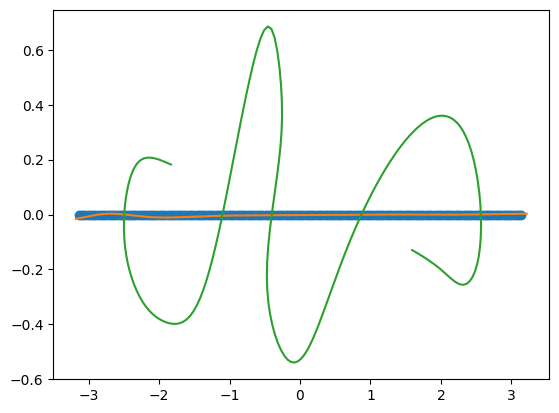

In [9]:
fig, axs = plt.subplots()
axs.scatter(line_points[:, 0], line_points[:, 1], color="C0")
axs.plot(line_test_embedding_line[:, 0], line_test_embedding_line[:, 1], color="C1")
axs.plot(ring_test_embedding_line[:, 0], ring_test_embedding_line[:, 1], color="C2")


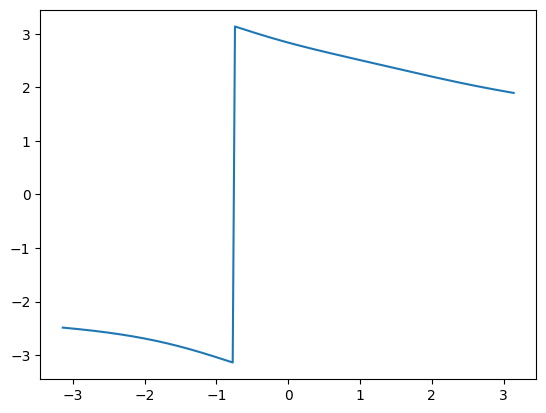

In [10]:
fig, axs = plt.subplots()
axs.plot(line_phases, ring_decode_line_phases)

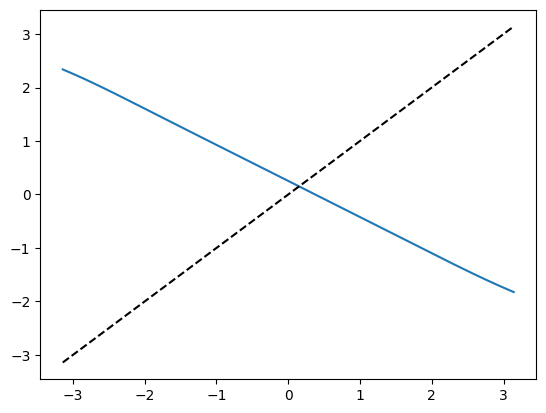

In [11]:
fig, axs = plt.subplots()
axs.plot(line_phases, line_decode_line_phases)
axs.plot(line_phases, line_phases, linestyle="--", color="black")

In [12]:
ring_phases = np.linspace(start=-np.pi, stop=np.pi, num=200)
ring_points = np.stack([np.sin(ring_phases), np.cos(ring_phases)], axis=-1)

In [14]:
line_encoder_ring, line_decoder_ring, line_costs_ring = decode_1d.train(ring_points, 0, 1, device, n_training_iterations=1500,
                                                          verbose=True, integration_resamples=30, encoder_hidden_dim=200, decoder_hidden_dim=200)
print(line_costs_ring)


/home/trevor/brainvenv/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


iteration: 0, decoding loss: 0.5100401043891907, distance cost: 0.004089720081537962, order reduction: 0.02718089148402214, kl: 0.9349929690361023
iteration: 1, decoding loss: 0.5187560319900513, distance cost: 0.0002523715083952993, order reduction: 0.0005841297097504139, kl: 0.8370180726051331
iteration: 2, decoding loss: 0.4982706308364868, distance cost: 0.0009446615586057305, order reduction: 0.0009570462279953063, kl: 0.7299137115478516
iteration: 3, decoding loss: 0.4692290425300598, distance cost: 0.0035834775771945715, order reduction: 0.00038079963997006416, kl: 0.6437668204307556
iteration: 4, decoding loss: 0.4314655363559723, distance cost: 0.009769619442522526, order reduction: 0.0006654579774476588, kl: 0.5129082798957825
iteration: 5, decoding loss: 0.390320748090744, distance cost: 0.01538348849862814, order reduction: 0.05625808984041214, kl: 0.4051472544670105
iteration: 6, decoding loss: 0.36057448387145996, distance cost: 0.027393193915486336, order reduction: 0.05

In [15]:
ring_encoder_ring, ring_decoder_ring, ring_costs_ring = decode_1d.train(ring_points, 1, 0, device, n_training_iterations=1500,
                                                          verbose=True, integration_resamples=30, div_weight=0, decoder_hidden_dim=200, encoder_hidden_dim=200)
print(ring_costs_ring)


iteration: 0, decoding loss: 0.4812939763069153, distance cost: 0.18903489410877228, order reduction: 0.01228814572095871, kl: 0.8522925972938538
iteration: 6, decoding loss: 0.5355092287063599, distance cost: 0.05629311501979828, order reduction: 0.0025650616735219955, kl: 0.04687383025884628
iteration: 8, decoding loss: 0.5354350805282593, distance cost: 0.02901310846209526, order reduction: 0.0022912786807864904, kl: 0.018935171887278557
iteration: 21, decoding loss: 0.486494779586792, distance cost: 0.03126583248376846, order reduction: 0.0025587703566998243, kl: 0.08801155537366867
iteration: 23, decoding loss: 0.4663393199443817, distance cost: 0.030279548838734627, order reduction: 0.0030002847779542208, kl: 0.03673654794692993
iteration: 25, decoding loss: 0.4648570120334625, distance cost: 0.026016293093562126, order reduction: 0.0032315165735781193, kl: 0.04677340015769005
iteration: 26, decoding loss: 0.4367291331291199, distance cost: 0.025652792304754257, order reduction: 

In [16]:
with torch.no_grad():
    line_test_embedding_ring = line_encoder_ring(torch.tensor(np.expand_dims(line_phases, -1), dtype=torch.get_default_dtype()).to(device))
    ring_test_embedding_ring = ring_encoder_ring(torch.tensor(np.expand_dims(line_phases, -1), dtype=torch.get_default_dtype()).to(device))

line_test_embedding_ring = line_test_embedding_ring.cpu().numpy()
ring_test_embedding_ring = ring_test_embedding_ring.cpu().numpy()

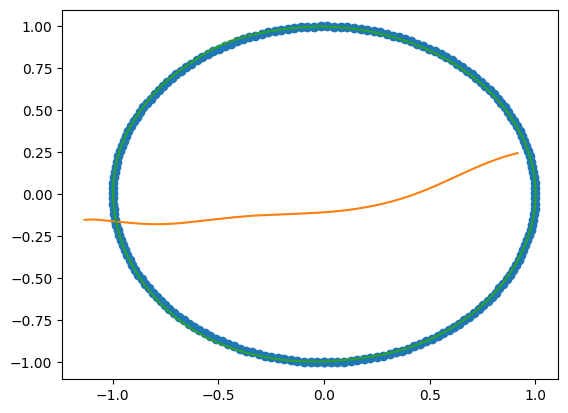

In [17]:
fig, axs = plt.subplots()
axs.scatter(ring_points[:, 0], ring_points[:, 1], color="C0")
axs.plot(line_test_embedding_ring[:, 0], line_test_embedding_ring[:, 1], color="C1")
axs.plot(ring_test_embedding_ring[:, 0], ring_test_embedding_ring[:, 1], color="C2")
